In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('SpotifySongs2024.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

1. Track Name: Name of the song.
2. Album Name: Name of the album the song belongs to.
3. Artist: Name of the artist(s) of the song.
4. Release Date: Date when the song was released.
5. ISRC: International Standard Recording Code for the song.
6. All Time Rank: Ranking of the song based on its all-time popularity.
7. Track Score: Score assigned to the track based on various factors.
8. Spotify Streams: Total number of streams on Spotify.
9. Spotify Playlist Count: Number of Spotify playlists the song is included in.
10. Spotify Playlist Reach: Reach of the song across Spotify playlists.
11. Spotify Popularity: Popularity score of the song on Spotify.
12. YouTube Views: Total views of the song's official video on YouTube.
13. YouTube Likes: Total likes on the song's official video on YouTube.
14. TikTok Posts: Number of TikTok posts featuring the song.
15. TikTok Likes: Total likes on TikTok posts featuring the song.
16. TikTok Views: Total views on TikTok posts featuring the song.
17. YouTube Playlist Reach: Reach of the song across YouTube playlists.
18. Apple Music Playlist Count: Number of Apple Music playlists the song is included in.
19. AirPlay Spins: Number of times the song has been played on radio stations.
20. SiriusXM Spins: Number of times the song has been played on SiriusXM.
21. Deezer Playlist Count: Number of Deezer playlists the song is included in.
22. Deezer Playlist Reach: Reach of the song across Deezer playlists.
23. Amazon Playlist Count: Number of Amazon Music playlists the song is included in.
24. Pandora Streams: Total number of streams on Pandora.
25. Pandora Track Stations: Number of Pandora stations featuring the song.
26. Soundcloud Streams: Total number of streams on Soundcloud.
27. Shazam Counts: Total number of times the song has been Shazamed.
28. TIDAL Popularity: Popularity score of the song on TIDAL.
29. Explicit Track: Indicates whether the song contains explicit content.

In [63]:
df.head()

col_to_numeric = ['All Time Rank', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']

for col in col_to_numeric:
    df[col] = df[col].str.replace(',', '')
    df[col] = pd.to_numeric(df[col])

df = df.drop('TIDAL Popularity', axis = 1)
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release_Year'] = df['Release Date'].dt.year
df = df.drop('ISRC', axis = 1)

In [26]:
df[df.duplicated() == True]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,TCAGJ2289254,2424,28.9,227893586.0,28139.0,12480714.0,...,129172.0,34.0,5.0,1370.0,49.0,56972562.0,26968.0,1336043.0,708143.0,0
3450,Dembow,Dembow,Danny Ocean,2017-12-08,USWL11700269,3441,23.3,579189526.0,60397.0,11805084.0,...,5406.0,9.0,20.0,37649.0,12.0,6723858.0,7832.0,NaN,1619550.0,0


In [64]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [65]:
df.describe(include = 'all')

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Release_Year
count,4598,4598,4593,4598,4598,4598.000000,4598.000000,4.485000e+03,4528.000000,4.526000e+03,...,2475.000000,3677.000000,3.670000e+03,3543.000000,3.492000e+03,3.330000e+03,1.266000e+03,4.021000e+03,4598.000000,4598.000000
unique,4370,4005,1999,NaN,4598,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Danza Kuduro - Cover,Un Verano Sin Ti,Taylor Swift,NaN,QM24S2402528,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13,20,63,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2021-01-27 10:44:50.213136128,NaN,2290.398869,41.850892,4.474069e+08,59397.509496,2.335177e+07,...,257.534949,32.321730,1.295634e+06,25.346034,8.569817e+07,8.791929e+04,1.485864e+07,2.529828e+06,0.359069,2020.617225
min,NaN,NaN,NaN,1987-07-21 00:00:00,NaN,1.000000,19.400000,1.071000e+03,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000e+00,1.800000e+01,1.000000e+00,0.000000,1987.000000
25%,NaN,NaN,NaN,2019-07-17 06:00:00,NaN,1144.250000,23.300000,7.035455e+07,6705.000000,4.789848e+06,...,25.000000,5.000000,5.238225e+04,8.000000,1.055281e+06,1.260500e+03,7.668208e+05,2.301330e+05,0.000000,2019.000000
50%,NaN,NaN,NaN,2022-06-01 00:00:00,NaN,2289.500000,29.900000,2.398507e+08,32312.500000,1.326411e+07,...,86.000000,15.000000,2.374070e+05,17.000000,1.273577e+07,7.818000e+03,3.265268e+06,8.545840e+05,0.000000,2022.000000
75%,NaN,NaN,NaN,2023-08-11 00:00:00,NaN,3435.750000,44.475000,6.291025e+08,86083.250000,2.966802e+07,...,256.000000,37.000000,9.068458e+05,34.000000,8.155552e+07,4.945000e+04,1.339074e+07,2.686409e+06,1.000000,2023.000000
max,NaN,NaN,NaN,2024-06-14 00:00:00,NaN,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,...,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,3.198359e+08,2.197945e+08,1.000000,2024.000000


In [42]:
# Top 10 songs
top_10_songs = df[df['All Time Rank'] <= 10].sort_values('All Time Rank', ascending = False)

<BarContainer object of 10 artists>

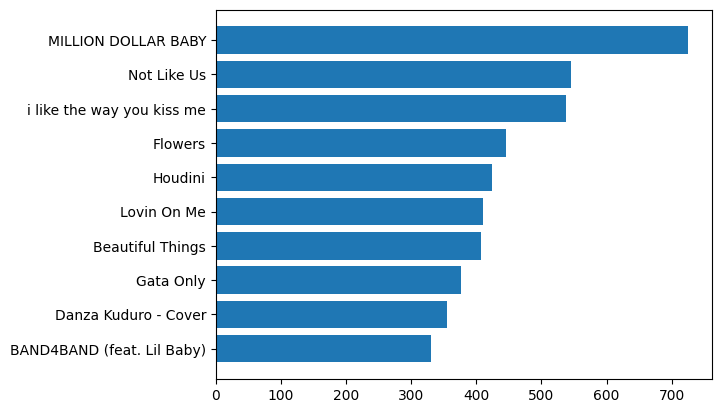

In [43]:
plt.barh(y = top_10_songs['Track'] , width = top_10_songs['Track Score'])

<BarContainer object of 10 artists>

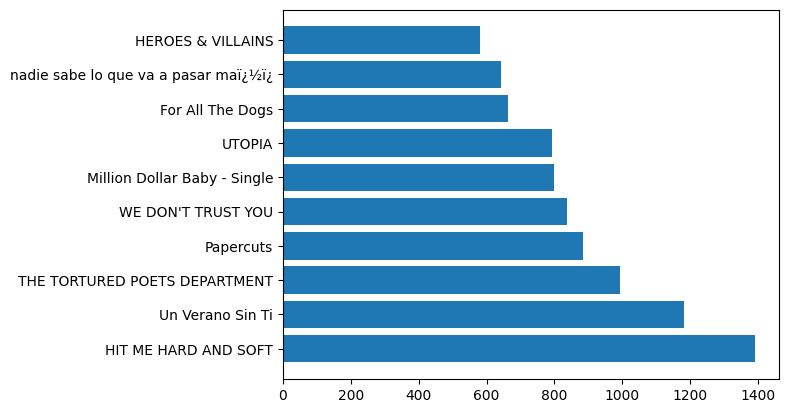

In [56]:
# Top 10 albums
top_10_albums = df.groupby('Album Name', as_index = False).aggregate({'Track Score' : 'sum', 'Track' : 'count'}).sort_values('Track Score', ascending = False)
top_10_albums = top_10_albums.head(10)
plt.barh(y = top_10_albums['Album Name'] , width = top_10_albums['Track Score'])

<BarContainer object of 10 artists>

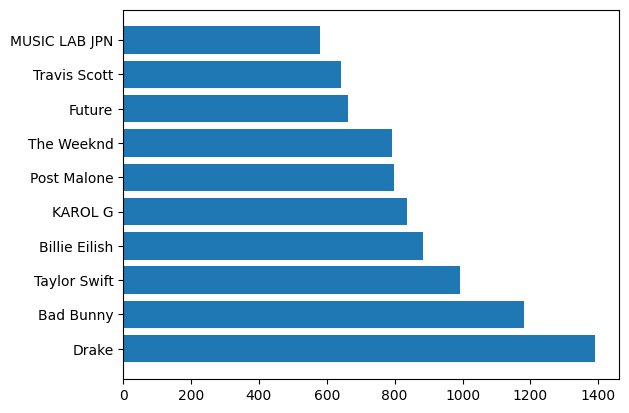

In [57]:
# Top 10 artists
top_10_artists = df.groupby('Artist', as_index = False).aggregate({'Track Score' : 'sum', 'Track' : 'count'}).sort_values('Track Score', ascending = False)
top_10_artists = top_10_artists.head(10)
plt.barh(y = top_10_artists['Artist'] , width = top_10_albums['Track Score'])

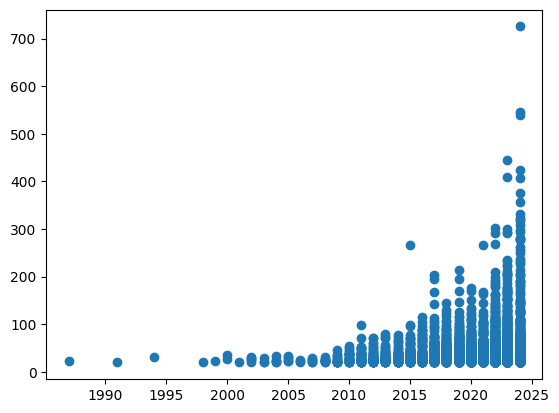

In [67]:
plt.scatter(df['Release_Year'], df['Track Score'])

In [70]:
df.info()
df_quant = df.select_dtypes(exclude = 'object')

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4593 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   ISRC                        4598 non-null   object        
 5   All Time Rank               4598 non-null   int64         
 6   Track Score                 4598 non-null   float64       
 7   Spotify Streams             4485 non-null   float64       
 8   Spotify Playlist Count      4528 non-null   float64       
 9   Spotify Playlist Reach      4526 non-null   float64       
 10  Spotify Popularity          3794 non-null   float64       
 11  YouTube Views               4290 non-null   float64       
 1

<Axes: >

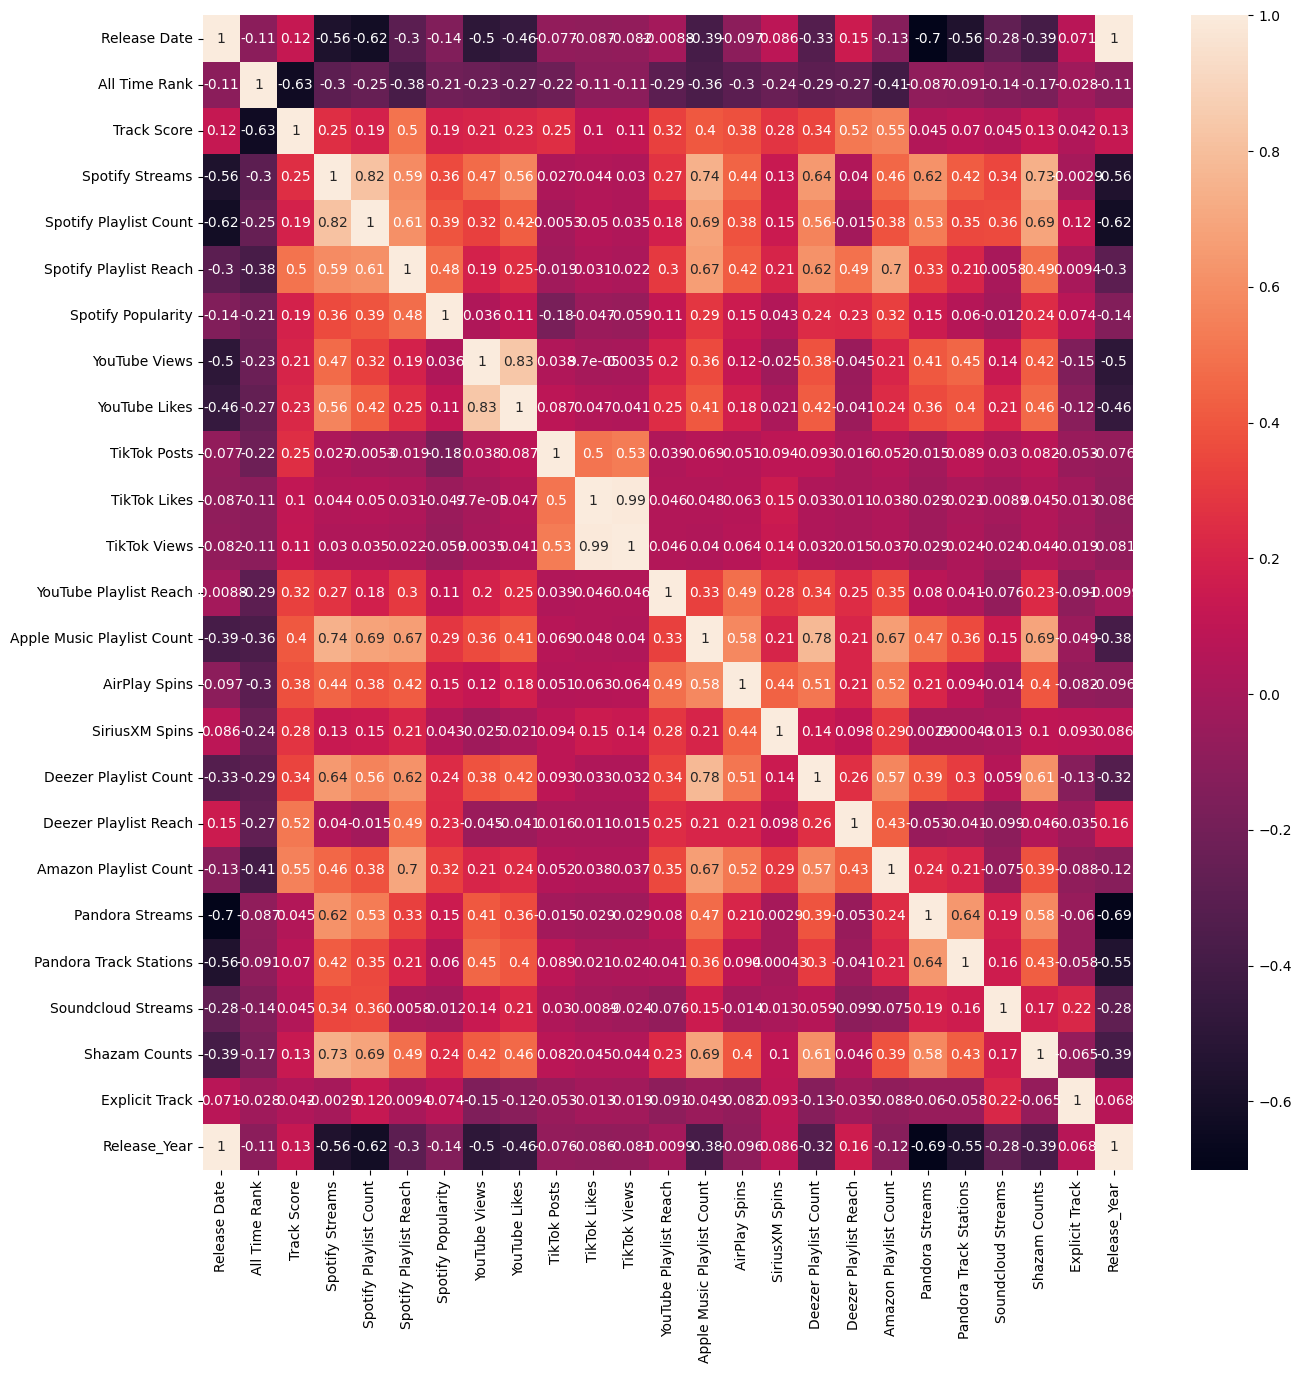

In [72]:
model_corr = df_quant.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(model_corr, annot = True)

In [75]:
df['Total_Playlist_Count'] = df['Spotify Playlist Count'] + df['Apple Music Playlist Count'] + df['Deezer Playlist Count'] + df['Amazon Playlist Count']
df['Total_Playlist_Reach'] = df['Spotify Playlist Reach'] + df['Deezer Playlist Reach'] + df['YouTube Playlist Reach']
df['Total_Streams'] = df['Spotify Streams'] + df['Pandora Streams'] + df['Soundcloud Streams']
df['Total_Video_Views'] = df['YouTube Views'] + df['TikTok Views']
df['Total_Video_Likes'] = df['YouTube Likes'] + df['TikTok Likes']
df['Total_Spins'] = df['AirPlay Spins'] + df['SiriusXM Spins']

<Axes: >

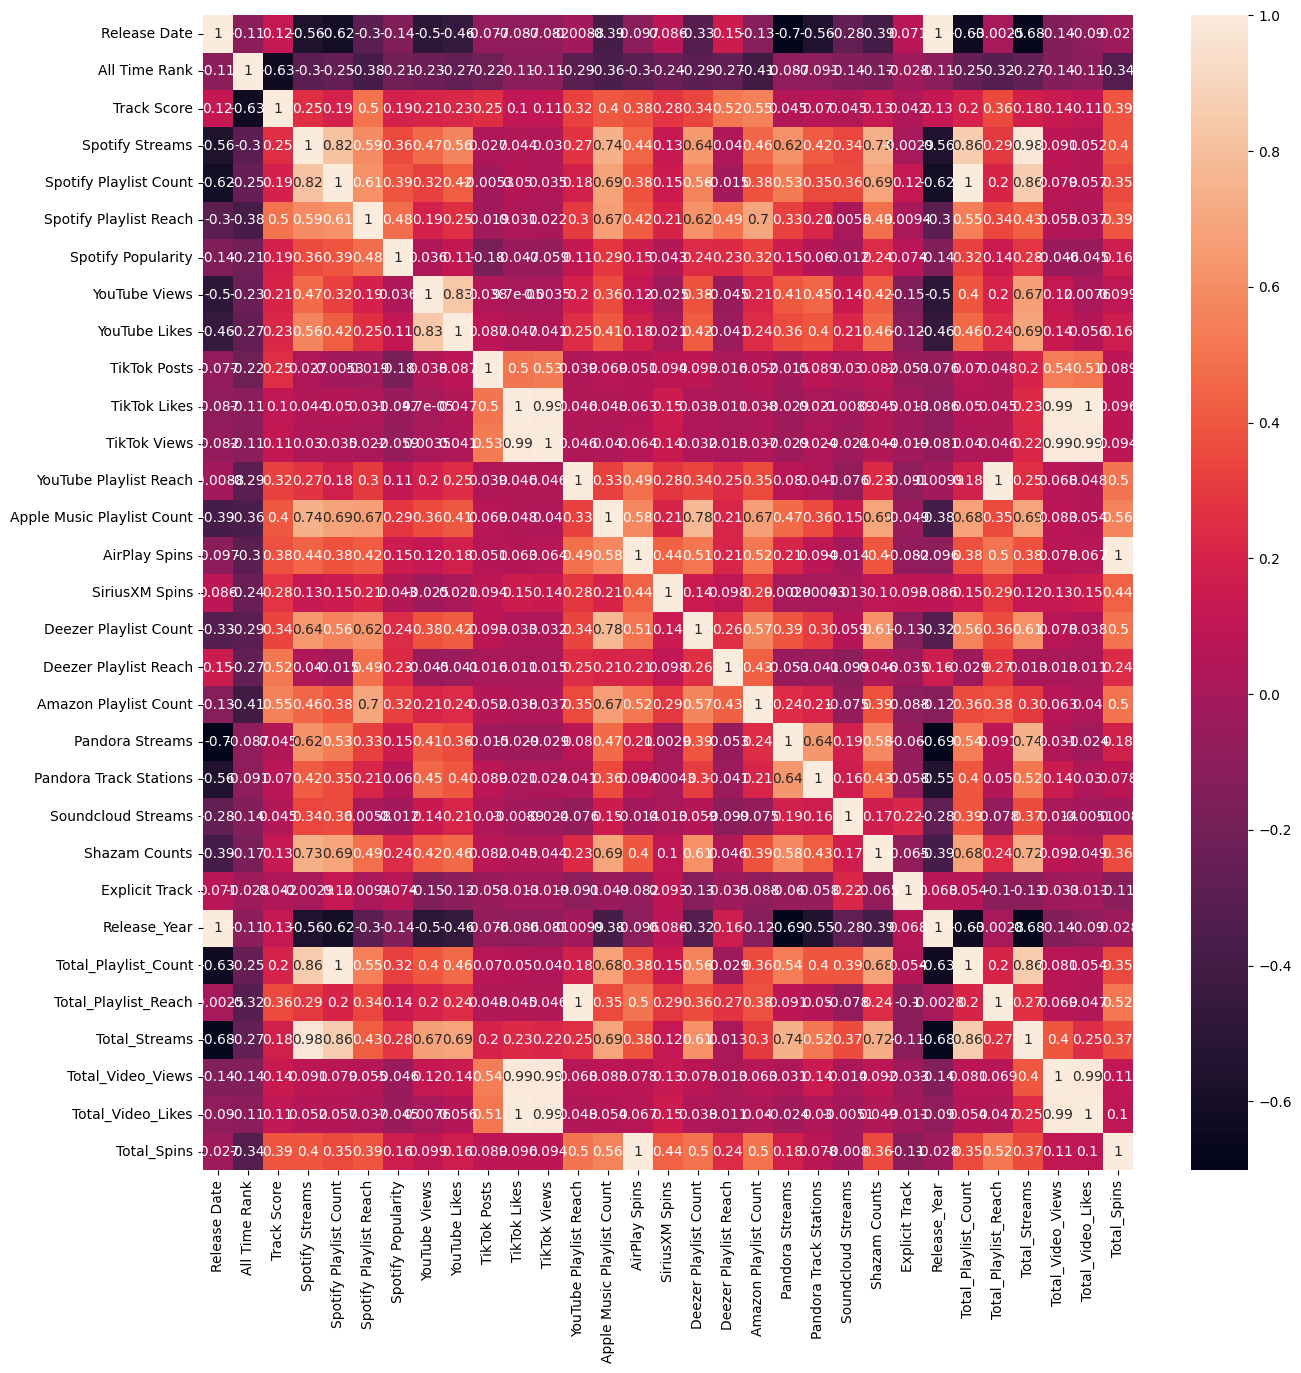

In [78]:
df_quant_2 = df.select_dtypes(exclude = 'object')
model_corr_2 = df_quant_2.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(model_corr_2, annot = True)